In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\moham\OneDrive\Desktop\Courses\Elevvo Internship\Sentiment Analysis\Sentiment Analysis\Data\IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Lowercasing

Removing punctuation, stopwords, and HTML tags

Tokenizing the text

In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words('english'))

In [9]:
stemmer = PorterStemmer()

In [10]:
def clean_text(text):
    # Lowercase and remove HTML tags
    text = re.sub(r'<.*?>', '', text.lower())

    # Remove non-letter characters (punctuation, numbers, symbols)
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize, remove stopwords, apply stemming
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    
    # Rejoin, strip leading/trailing spaces, fix multiple spaces
    cleaned = re.sub(r'\s+', ' ', " ".join(words)).strip()
    return cleaned

In [11]:
df['clean_review'] = df['review'].apply(clean_text)

In [12]:
df

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movi right good job wasnt creativ orig...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogu bad act idiot direct anno...
49997,I am a Catholic taught in parochial elementary...,negative,cathol taught parochi elementari school nun ta...
49998,I'm going to have to disagree with the previou...,negative,im go disagre previou comment side maltin one ...


In [13]:
df[['review', 'clean_review']]

,review,clean_review
0,One of the other reviewers has mentioned that ...,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visual stun film...
...,...,...
49995,I thought this movie did a down right good job...,thought movi right good job wasnt creativ orig...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",bad plot bad dialogu bad act idiot direct anno...
49997,I am a Catholic taught in parochial elementary...,cathol taught parochi elementari school nun ta...
49998,I'm going to have to disagree with the previou...,im go disagre previou comment side maltin one ...


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
X = df['clean_review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})  # Convert labels to binary (Label encoding)

In [16]:
X

0        one review mention watch oz episod youll hook ...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic there famili littl boy jake think there ...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job wasnt creativ orig...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    im go disagre previou comment side maltin one ...
49999    one expect star trek movi high art fan expect ...
Name: clean_review, Length: 50000, dtype: object

In [17]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [19]:
X_train

25164    anoth must film henri brandon favorit surpris ...
37366    time ever actual laugh watch show im make fun ...
24912    bad act bunch castaway alien planet sure look ...
7345     german think smirk funni like american think m...
28620    certainli one time fav episod trek much go one...
                               ...                        
13927    end movi still dont know whether like case rev...
919      mani mani year saw beauti love stori think wou...
38467    power kangwon provinc director hong sangsoo se...
10742    movi start strong cool j deed undercov polic o...
49689    rememb see movi kid one day wonder world disne...
Name: clean_review, Length: 40000, dtype: object

In [20]:
X_test

29430    love movi im big fan sean bean thought would l...
27750    film tend get buri prejudic preconcept remak d...
47782    howard brackett kevin kline teacher get marri ...
10498    like singin rain cover girl trio two guy girl ...
24747    father pride best new show hit televis sinc fa...
                               ...                        
31675    loss find word express bad thought film initi ...
31393    one best film ive seen silent era sad say ive ...
3319     okay let start say film exact rendit crime leg...
30364    alway tri harsh critic someth didnt like watch...
42618    real expect go movi im glad even expect bad wo...
Name: clean_review, Length: 10000, dtype: object

In [21]:
y_train

25164    1
37366    0
24912    0
7345     0
28620    1
        ..
13927    1
919      1
38467    1
10742    0
49689    1
Name: sentiment, Length: 40000, dtype: int64

In [22]:
y_test

29430    0
27750    1
47782    1
10498    0
24747    1
        ..
31675    0
31393    1
3319     1
30364    0
42618    0
Name: sentiment, Length: 10000, dtype: int64

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
vectorizer = TfidfVectorizer(
    max_features=5000,         # Limit to top 5000 words
    ngram_range=(1, 2),        # Include unigrams and bigrams
    stop_words='english'       # Built-in stopwords removal (backup)
)

In [25]:
vectorizer

TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

In [26]:
X_train_vec = vectorizer.fit_transform(X_train)


In [27]:
X_train_vec

<40000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3004959 stored elements in Compressed Sparse Row format>

In [28]:
X_test_vec

NameError: name 'X_test_vec' is not defined

### Prediction with logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = clf.predict(X_test_vec)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8835


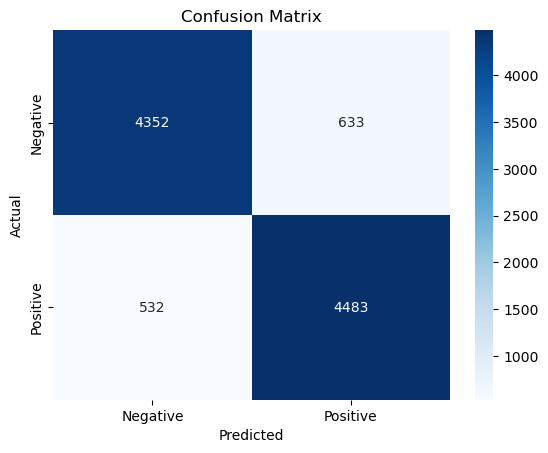

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      4985
    Positive       0.88      0.89      0.89      5015

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
def predict_sentiment_logreg(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    pred = clf.predict(vec)[0]
    return "positive" if pred == 1 else "negative"

In [ ]:
# user_input = input("Enter your review: ")
# print("Predicted Sentiment:", predict_sentiment_logreg(user_input))

In [ ]:
print(predict_sentiment_logreg("I absolutely loved this movie!"))

positive


### Prediction with Neural Network Code (Using Keras)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_vec.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output
])

c:\Users\moham\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_vec.toarray(), y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7939 - loss: 0.4517 - val_accuracy: 0.8870 - val_loss: 0.2756
Epoch 2/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9117 - loss: 0.2266 - val_accuracy: 0.8842 - val_loss: 0.2792
Epoch 3/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9301 - loss: 0.1869 - val_accuracy: 0.8785 - val_loss: 0.2934
Epoch 4/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9509 - loss: 0.1412 - val_accuracy: 0.8842 - val_loss: 0.3226
Epoch 5/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9688 - loss: 0.0979 - val_accuracy: 0.8773 - val_loss: 0.3882


In [ ]:
loss, acc = model.evaluate(X_test_vec.toarray(), y_test)
print(f"Neural Network Accuracy: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8751 - loss: 0.4077
Neural Network Accuracy: 0.8753


In [ ]:
def predict_sentiment_nn(text):
    # Preprocess the text
    cleaned = clean_text(text)
    # Vectorize
    vec = vectorizer.transform([cleaned])
    # Convert sparse matrix to dense
    vec_dense = vec.toarray()
    # Predict (output is a probability)
    prob = model.predict(vec_dense)[0][0]
    return "positive" if prob >= 0.5 else "negative"

In [ ]:
# user_input = input("Enter your review: ")
# print("Predicted Sentiment:", predict_sentiment_nn(user_input))

In [ ]:
print(predict_sentiment_nn("I absolutely loved this movie!"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
positive


### Optional Plotting (Accuracy vs. Epoch)

In [ ]:
import matplotlib.pyplot as plt

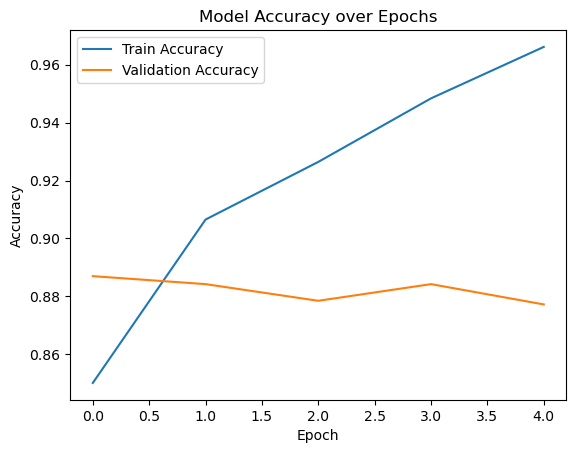

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Epochs')
plt.legend()
plt.show()

### Save the models

In [ ]:
# import joblib

In [ ]:
# joblib.dump(clf, 'sentiment_model.pkl')

['sentiment_model.pkl']

In [ ]:
# joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

### Download The models

In [ ]:
# clf_loaded = joblib.load('Models trained/sentiment_model.pkl')
# vectorizer_loaded = joblib.load('Models trained/tfidf_vectorizer.pkl')

In [ ]:
# def predict_from_saved(text):
#     cleaned = clean_text(text)
#     vec = vectorizer_loaded.transform([cleaned])
#     pred = clf_loaded.predict(vec)[0]
#     return "positive" if pred == 1 else "negative"

In [ ]:
# print(predict_from_saved("The movie was fantastic and emotional."))